#1. ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:

#@title Importação de Bibliotecas

import pandas as pd #Manipulação de conjuntos de dados
import numpy as np #Manipulações numéricas
import matplotlib.pyplot as plt #Análises gráficas
import seaborn as sns #Análises gráficas
import io #Manipulação de entradas e saídas
import gdown #Acesso a arquivos no Google Drive

from matplotlib.widgets import TextBox #Visualização de textos
from sklearn.preprocessing import StandardScaler #Normalização dos dados
from sklearn.neighbors import KNeighborsClassifier #Modelo KNN
from sklearn.ensemble import RandomForestClassifier #Modelo Floresta Aleatória
from sklearn.model_selection import train_test_split #Divisões dos conjuntos treino/teste
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Extração de indicadores
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Extração de matrizes

In [ ]:
# @title Importação do Conjunto de Dados

FILE = "17q-pzYIT--eNojoZDLDQRWrt6ADjiIH-"
URL = f"https://drive.google.com/uc?id={FILE}"
OUTPUT = "Churn_Modelling.csv"
gdown.download(url=URL,output=OUTPUT)
df = pd.read_csv(OUTPUT)

Downloading...
From: https://drive.google.com/uc?id=17q-pzYIT--eNojoZDLDQRWrt6ADjiIH-
To: /content/Churn_Modelling.csv
100%|██████████| 685k/685k [00:00<00:00, 87.5MB/s]


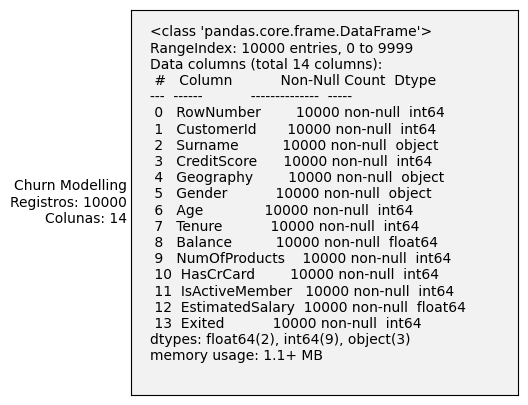

In [ ]:

# @title Verificação das Informações do Conjunto de Dados

buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()

plt.figure(figsize=(5,5))
ax = plt.subplot()
texto=f'''
Churn Modelling
Registros: {df.shape[0]}
Colunas: {df.shape[1]}
'''
textBox = TextBox(ax,label=texto,initial=s)

plt.show()

In [ ]:
# @title Visualização do Conjunto de Dados (a partir de agora chamado de DataFrame)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# @title Verificação das de Dados Nulos ou Duplicados
def nullAndDuplicates(df):
  nulos = df.isnull().sum()
  duplicados = df[df.duplicated()].sum()
display(pd.DataFrame([nulos, duplicados])
        .T
        .rename(columns={0:"Nulos",1:"Duplicados"})
       )

,Nulos,Duplicados
RowNumber,0.0,0.0
CustomerId,0.0,0.0
Surname,0.0,0.0
CreditScore,0.0,0.0
Geography,0.0,0.0
Gender,0.0,0.0
Age,0.0,0.0
Tenure,0.0,0.0
Balance,0.0,0.0
NumOfProducts,0.0,0.0


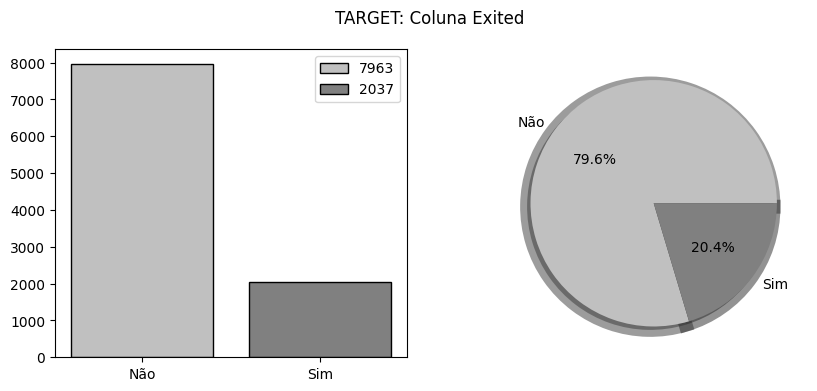

In [ ]:
# @title Verificação de Balanceamento da Variável Alvo (TARGET)

count = df[['Exited']].value_counts().values

fig = plt.figure(figsize=(10,4))
fig.suptitle('TARGET: Coluna Exited')

plt.subplot(1,2,1)
plt.bar(["Não","Sim"],count,color=['silver','gray'], label=count, edgecolor = "black")
plt.legend()

plt.subplot(1,2,2)
plt.pie(count, colors=['silver','gray'], labels=["Não","Sim"],autopct="%1.1f%%", shadow=True,wedgeprops = {'linewidth': 10})

plt.show()

In [ ]:
# @title Resumo das Variáveis Numéricas
display(df.describe(include=[np.number]))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# @title Resumo das Variáveis não Numéricas
display(df.describe(include=[object]).T)

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
# @title Retirada das Colunas sem Utilização
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [ ]:
# @title Verificação dos Valores das Colunas Categóricas
print(f"Geopraphy: {set(df['Geography'])}")
print(f"Gender: {set(df['Gender'])}")

Geopraphy: {'Spain', 'France', 'Germany'}
Gender: {'Female', 'Male'}


In [ ]:
# @title Codificação Ordinal das Colunas Categóricas
dictGeography = {"Germany" : 0, "France" : 1, "Spain" : 2}
df["Geography"] = df["Geography"].map(dictGeography)

dictGender = {"Male" : 0, "Female" : 1}
df["Gender"] = df["Gender"].map(dictGender)

print(f"Geopraphy: {set(df['Geography'])}")
print(f"Gender: {set(df['Gender'])}")

Geopraphy: {0, 1, 2}
Gender: {0, 1}


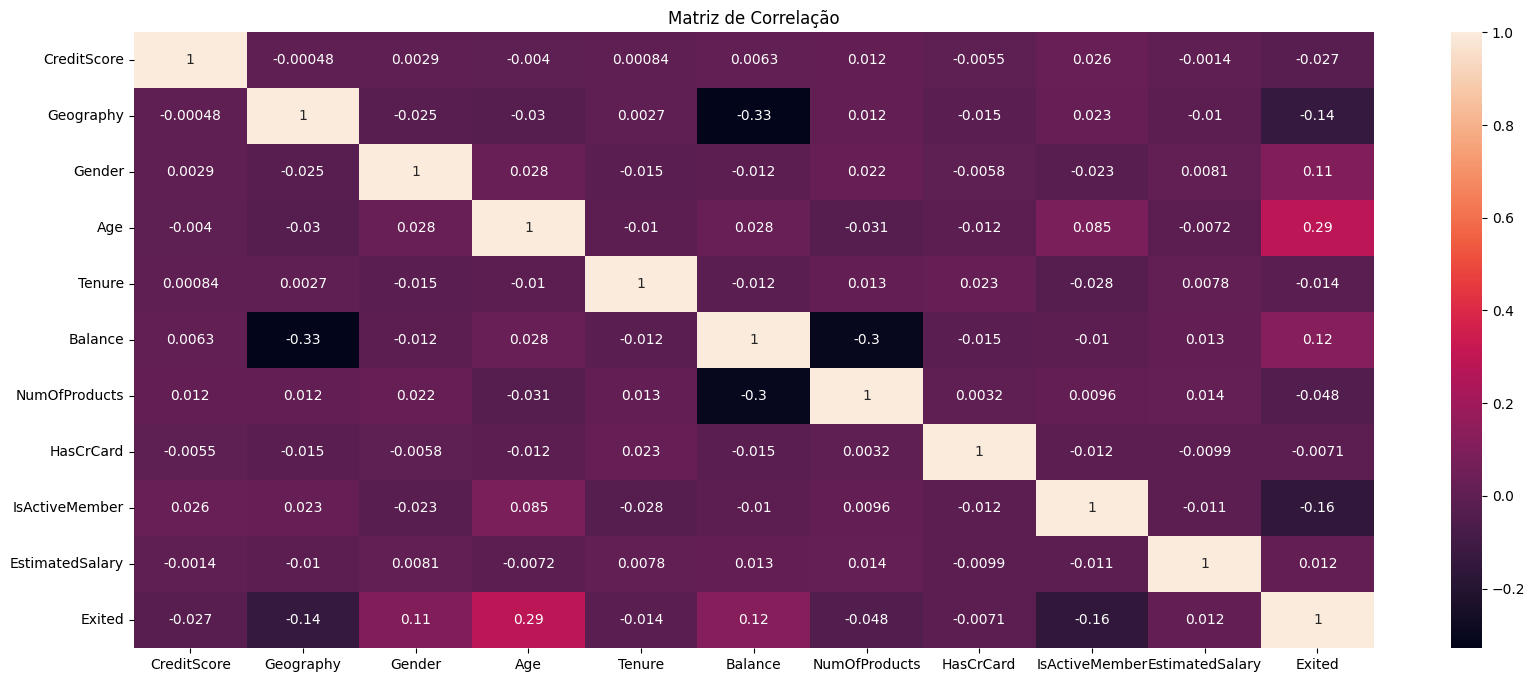

In [ ]:
# @title Montagem de Matriz de Correlação
correlacao = df.corr()
plt.figure(figsize=(20,8))
ax = sns.heatmap(correlacao,annot=True)
plt.title("Matriz de Correlação")
plt.show()

# 2. MONTAGEM DOS MODELOS DE PREDIÇÃO


# 2.1 PRÉ-PROCESSAMENTO

In [ ]:
# @title Divisão dos Conjuntos de Treino e Teste
X = df.drop(columns='Exited')
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# @title Padronização dos Dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.2 APLICAÇÃO DOS MODELOS

In [ ]:
# @title Instanciando os Modelos
knn = KNeighborsClassifier(n_neighbors = 5)
rf = RandomForestClassifier(random_state = 42)

In [ ]:
# @title Função para Aplicação de Modelo
def predicao(modelo, conjuntos):
    X_train, X_test, y_train, y_test = conjuntos

    #Fitting de Dados e Predição
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    #Calcula as métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return acc, prec, recall, f1, cm

In [ ]:
# @title Aplicação de Modelo Utilizando Técnicas de Programação Funcional
%%time

MODELOS = { "KNN": knn, "Floresta Aleatória": rf}
INDICADORES = ["accuracy", "precision", "recall", "f1-score"]

#Variáveis para armazenar os resultados
dfResultados = pd.DataFrame(index=INDICADORES,columns=MODELOS.keys())
listMatrix = []

#Execução da rotina de predição
for descricao, modelo in MODELOS.items():
  *dfResultados[descricao] , matrix = predicao(modelo, (X_train, X_test, y_train, y_test))
  listMatrix.append(matrix)

CPU times: user 1.2 s, sys: 5.15 ms, total: 1.2 s
Wall time: 1.21 s


#2.3 APRESENTAÇÃO DOS RESULTADOS

In [ ]:
# @title Indicadores
dfResultados.T.style.highlight_max(color='black')

,accuracy,precision,recall,f1-score
KNN,0.829500,0.641026,0.368550,0.468019
Floresta Aleatória,0.862500,0.779661,0.452088,0.572317


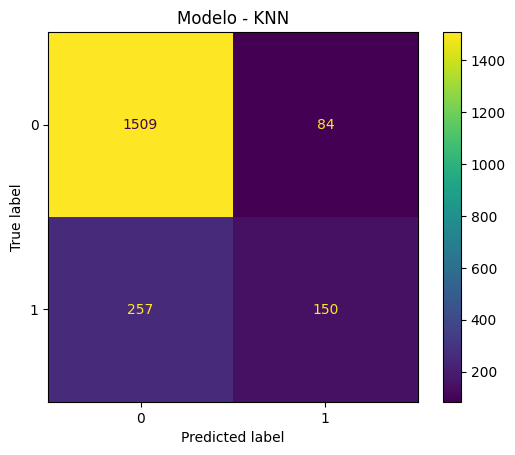

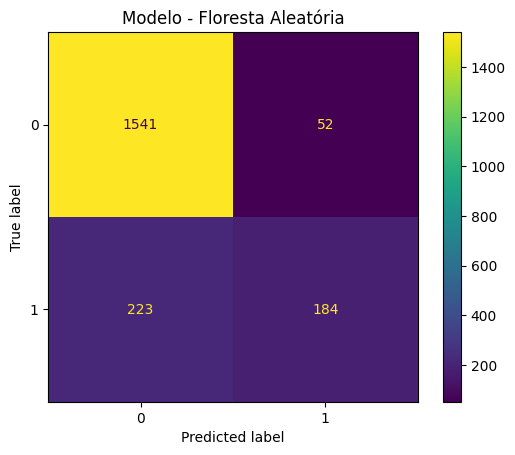

In [ ]:
# @title Matrizes de Confusão
for matrix, descricao in zip(listMatrix , MODELOS.keys()):
    disp = ConfusionMatrixDisplay(matrix)
    disp.plot()
    plt.title(f"Modelo - {descricao}")
    plt.show()